In [1]:
import pandas as pd

df= pd.read_csv('data.csv')

df.head()

Country  AveragScore  SafetySecurity  PersonelFreedom  Governance  \
0        Denmark        84.55           92.59            94.09       89.45   
1         Sweden        83.67           90.97            91.90       86.41   
2         Norway        83.59           93.30            94.10       89.66   
3        Finland        83.47           89.56            91.96       90.41   
4    Switzerland        83.42           95.66            87.50       87.67   

   SocialCapital  InvestmentEnvironment  EnterpriseConditions  \
0          82.56                  82.42                 79.64   
1          78.29                  82.81                 75.54   
2          79.03                  82.24                 75.95   
3          77.27                  84.12                 77.25   
4          69.14                  80.81                 83.84   

   MarketAccessInfrastructure  EconomicQuality  LivingConditions  Health  \
0                       78.79            76.81             95.77   81.07   
1                       79.67            76.18             95.33   82.28   
2                       75.87            77.25             94.70   82.98   
3                       78.77            70.28             94.46   81.19   
4                       78.65            79.71             94.66   82.11   

   Education  NaturalEnvironment  
0      87.48               73.94  
1      85.92               78.74  
2      85.68               72.37  
3      88.38               77.99  
4      87.72               73.60

In [2]:
df = df.select_dtypes(include=['int64','float64'])

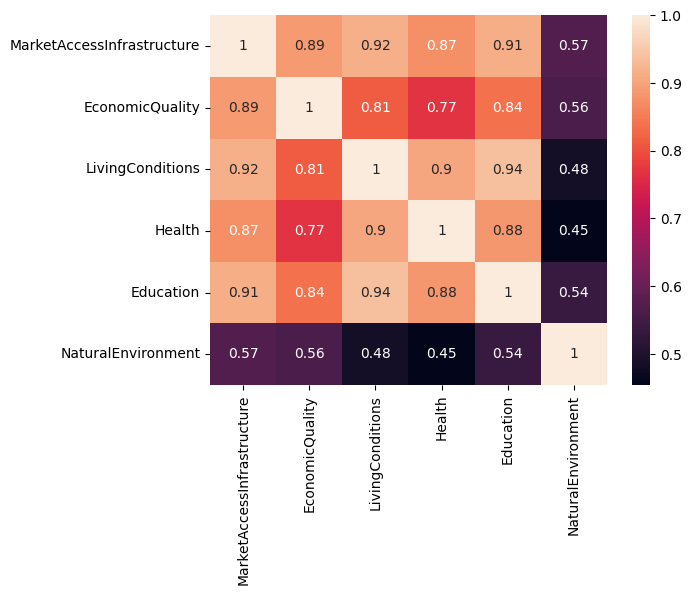

In [5]:
df#heatmap of df
import seaborn as sns
import matplotlib.pyplot as plt
df_numeric = df.select_dtypes(include=['float64', 'int64'])
df_numeric = df_numeric.iloc[:, 7:]
sns.heatmap(df_numeric.corr(), annot=True)
plt.show()

In [4]:
#shapiro test
from scipy.stats import shapiro

for col in df.columns:
    stat, p = shapiro(df[col])
    alpha = 0.05
    if p > alpha:
        print(col,'looks Gaussian (fail to reject H0)')
        df.drop(col, axis=1, inplace=True)

SocialCapital looks Gaussian (fail to reject H0)
NaturalEnvironment looks Gaussian (fail to reject H0)


In [5]:
def can_be_ranked(df):
    rankable = {}
    for column in df.columns:
        if pd.api.types.is_numeric_dtype(df[column]):
            rankable[column] = True
        else:
            rankable[column] = False
    return rankable
rankable_columns = can_be_ranked(df)
rankable_columns



{'AveragScore': True,
 'SafetySecurity': True,
 'PersonelFreedom': True,
 'Governance': True,
 'InvestmentEnvironment': True,
 'EnterpriseConditions': True,
 'MarketAccessInfrastructure': True,
 'EconomicQuality': True,
 'LivingConditions': True,
 'Health': True,
 'Education': True}

In [6]:

# Example of the Mann-Whitney U Test
from scipy.stats import mannwhitneyu
df.dropna(inplace=True)
numeric_df = df.select_dtypes(include=['number'])

for col1 in numeric_df.columns:
    for col2 in numeric_df.columns:
        if col1 != col2:  
            data1 = numeric_df[col1]
            data2 = numeric_df[col2]
            stat, p = mannwhitneyu(data1, data2)
            if p > 0.05:
                print('Probably the same distribution')

Probably the same distribution
Probably the same distribution
Probably the same distribution
Probably the same distribution
Probably the same distribution
Probably the same distribution
Probably the same distribution
Probably the same distribution
Probably the same distribution
Probably the same distribution
Probably the same distribution
Probably the same distribution
Probably the same distribution
Probably the same distribution
Probably the same distribution
Probably the same distribution
Probably the same distribution
Probably the same distribution
Probably the same distribution
Probably the same distribution
Probably the same distribution
Probably the same distribution
Probably the same distribution
Probably the same distribution
Probably the same distribution
Probably the same distribution
Probably the same distribution
Probably the same distribution
Probably the same distribution
Probably the same distribution


In [7]:
# check if df_numeric can be paired
def can_be_paired(df):
    pairable = {}
    for column in df.columns:
        if pd.api.types.is_numeric_dtype(df[column]):
            pairable[column] = True
        else:
            pairable[column] = False
    return pairable
pairable_columns = can_be_paired(numeric_df)

In [8]:
pairable_columns

{'AveragScore': True,
 'SafetySecurity': True,
 'PersonelFreedom': True,
 'Governance': True,
 'InvestmentEnvironment': True,
 'EnterpriseConditions': True,
 'MarketAccessInfrastructure': True,
 'EconomicQuality': True,
 'LivingConditions': True,
 'Health': True,
 'Education': True}

In [9]:

# Example of the Wilcoxon Signed-Rank Test
from scipy.stats import wilcoxon

for col1 in pairable_columns:
    for col2 in pairable_columns:
        if col1 != col2:
            if pairable_columns[col1] and pairable_columns[col2]:
                data1 = numeric_df[col1]
                data2 = numeric_df[col2]
                stat, p = wilcoxon(data1, data2)
                if p > 0.05:
                    print('Probably the same distribution')

Probably the same distribution
Probably the same distribution
Probably the same distribution
Probably the same distribution
Probably the same distribution
Probably the same distribution
Probably the same distribution
Probably the same distribution
Probably the same distribution
Probably the same distribution
Probably the same distribution
Probably the same distribution


In [10]:
from scipy.stats import kruskal

for col1 in numeric_df.columns:
    for col2 in numeric_df.columns:
        if col1 != col2:
            data1 = numeric_df[col1]
            data2 = numeric_df[col2]
            stat, p = kruskal(data1, data2)
            if p > 0.05:
                print('Probably the same distribution')

Probably the same distribution
Probably the same distribution
Probably the same distribution
Probably the same distribution
Probably the same distribution
Probably the same distribution
Probably the same distribution
Probably the same distribution
Probably the same distribution
Probably the same distribution
Probably the same distribution
Probably the same distribution
Probably the same distribution
Probably the same distribution
Probably the same distribution
Probably the same distribution
Probably the same distribution
Probably the same distribution
Probably the same distribution
Probably the same distribution
Probably the same distribution
Probably the same distribution
Probably the same distribution
Probably the same distribution
Probably the same distribution
Probably the same distribution
Probably the same distribution
Probably the same distribution
Probably the same distribution
Probably the same distribution


In [ ]:
import pandas as pd
from scipy.stats import friedmanchisquare
from sklearn.preprocessing import StandardScaler

# Assuming numeric_df is your dataframe containing numeric data
# Select numeric columns
numeric_df = df.select_dtypes(include=['number'])

# Normalize the data
scaler = StandardScaler()
normalized_df = pd.DataFrame(scaler.fit_transform(numeric_df), columns=numeric_df.columns)

# Define pairable_columns as the list of column names to be tested
pairable_columns = normalized_df.columns

# Perform the Friedman test
for i, col1 in enumerate(pairable_columns):
    for j, col2 in enumerate(pairable_columns):
        for k, col3 in enumerate(pairable_columns):
            if i < j < k:  # Ensure unique triplets
                data1 = normalized_df[col1]
                data2 = normalized_df[col2]
                data3 = normalized_df[col3]
                stat, p = friedmanchisquare(data1, data2, data3)
                print(f'Statistics for {col1} vs {col2} vs {col3}: stat={stat:.3f}, p={p:.3f}')
                if p > 0.05:
                    print('Probably the same distribution')
                else:
                    print('Probably different distributions')


Statistics for AveragScore vs SafetySecurity vs PersonelFreedom: stat=3.641, p=0.162
Probably the same distribution
Statistics for AveragScore vs SafetySecurity vs Governance: stat=0.048, p=0.976
Probably the same distribution
Statistics for AveragScore vs SafetySecurity vs InvestmentEnvironment: stat=0.515, p=0.773
Probably the same distribution
Statistics for AveragScore vs SafetySecurity vs EnterpriseConditions: stat=0.084, p=0.959
Probably the same distribution
Statistics for AveragScore vs SafetySecurity vs MarketAccessInfrastructure: stat=1.593, p=0.451
Probably the same distribution
Statistics for AveragScore vs SafetySecurity vs EconomicQuality: stat=0.048, p=0.976
Probably the same distribution
Statistics for AveragScore vs SafetySecurity vs LivingConditions: stat=0.443, p=0.801
Probably the same distribution
Statistics for AveragScore vs SafetySecurity vs Health: stat=0.335, p=0.846
Probably the same distribution
Statistics for AveragScore vs SafetySecurity vs Education: stat

C:\Users\sleep\AppData\Local\Temp\ipykernel_22780\1636073632.py:7: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=df, x=col, hue=categorical_column, fill=True, palette='Set2')


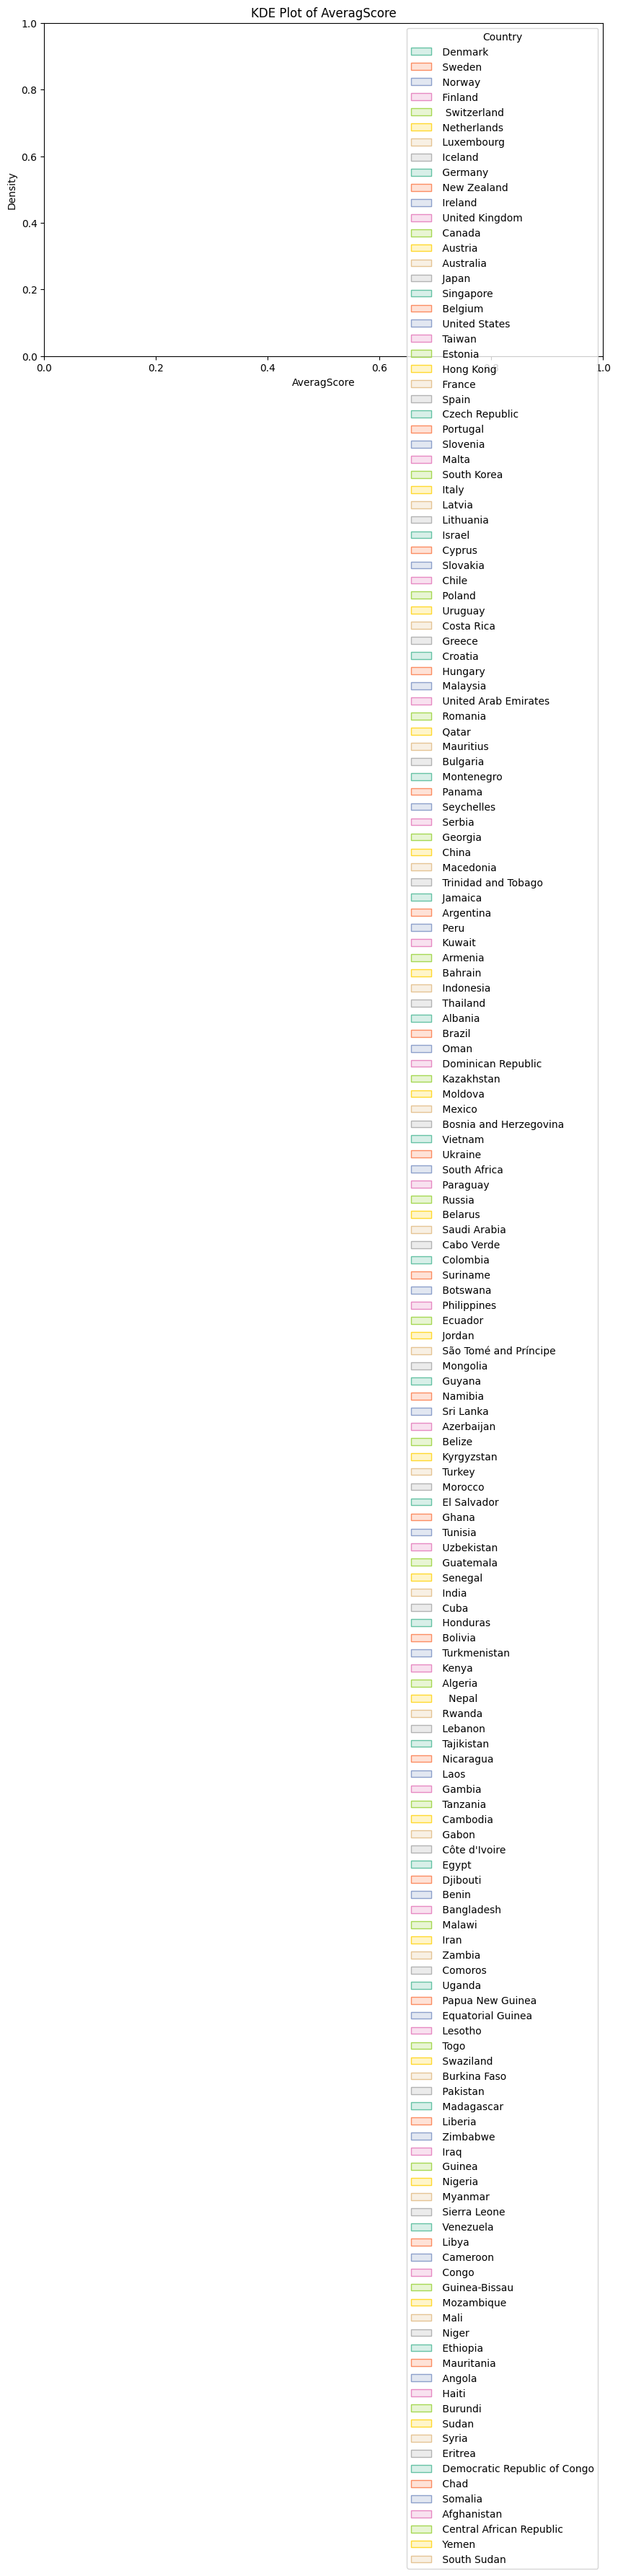

C:\Users\sleep\AppData\Local\Temp\ipykernel_22780\1636073632.py:7: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=df, x=col, hue=categorical_column, fill=True, palette='Set2')


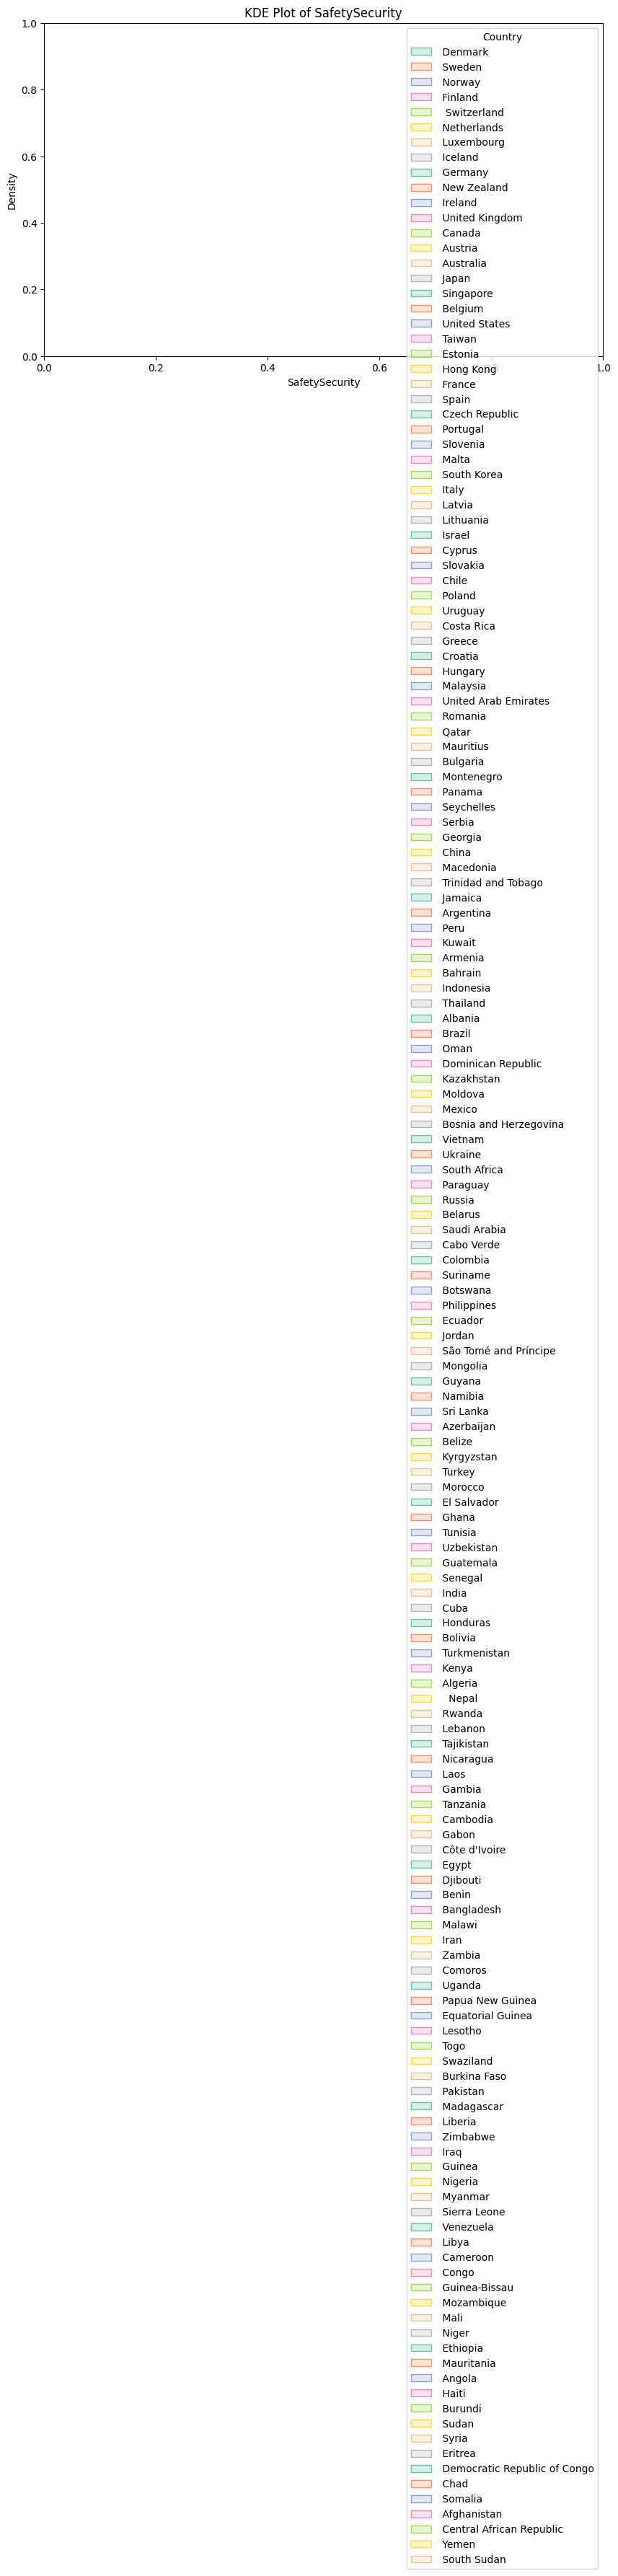

C:\Users\sleep\AppData\Local\Temp\ipykernel_22780\1636073632.py:7: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=df, x=col, hue=categorical_column, fill=True, palette='Set2')


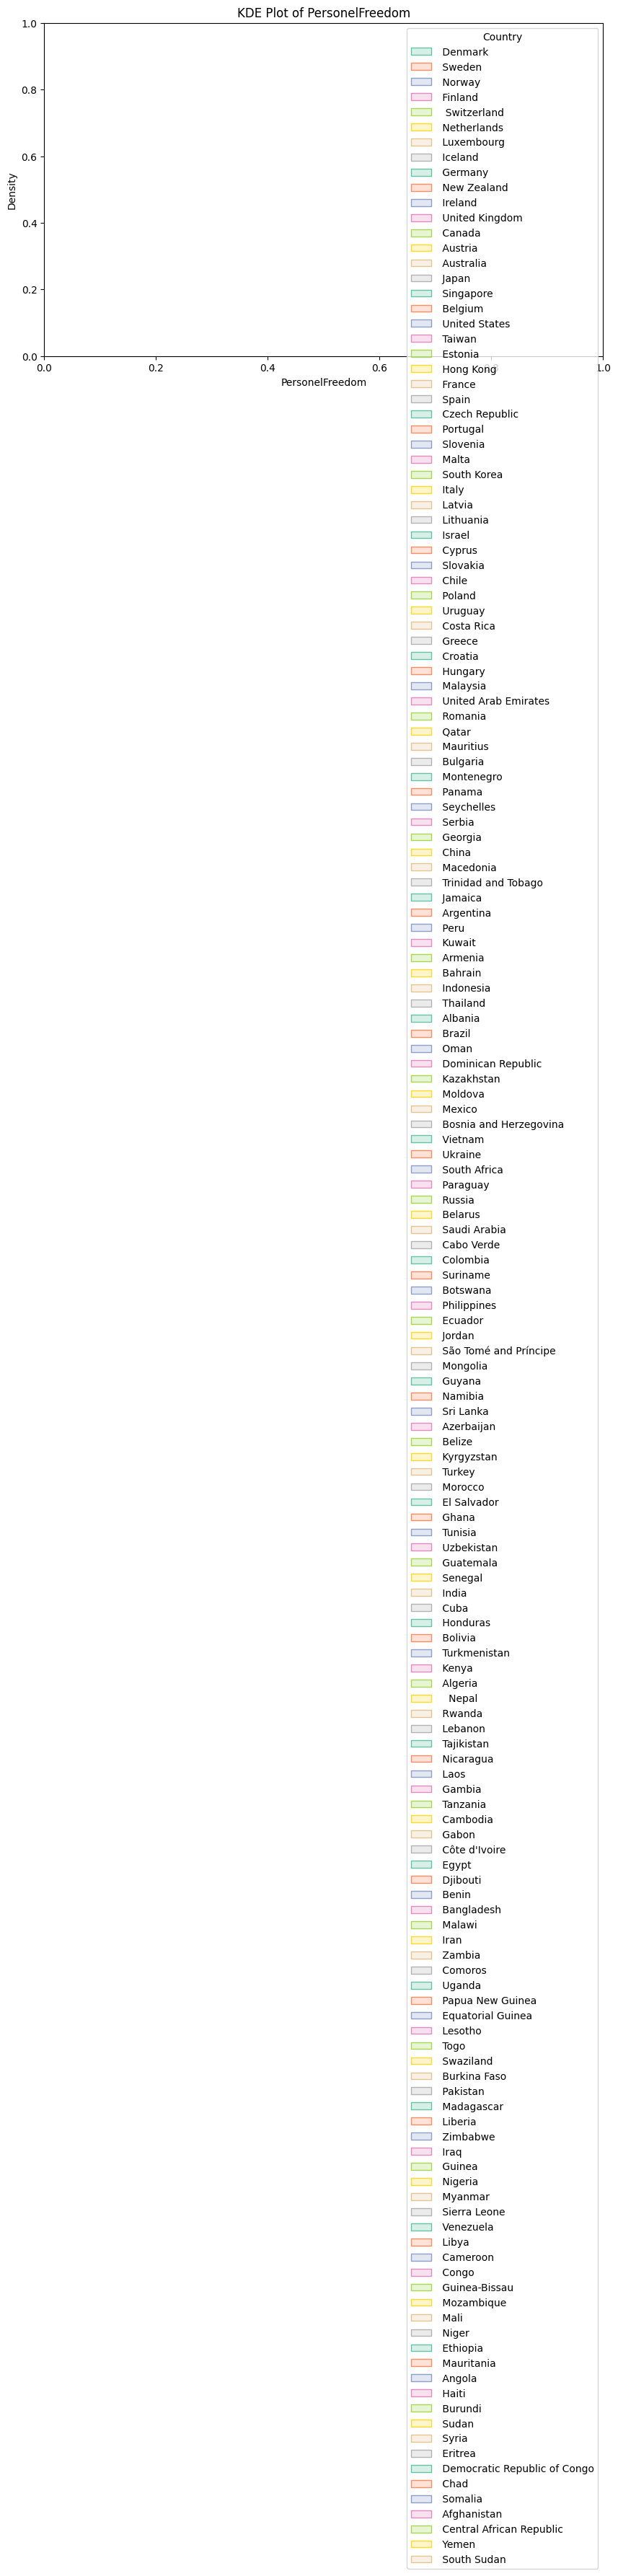

C:\Users\sleep\AppData\Local\Temp\ipykernel_22780\1636073632.py:7: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=df, x=col, hue=categorical_column, fill=True, palette='Set2')


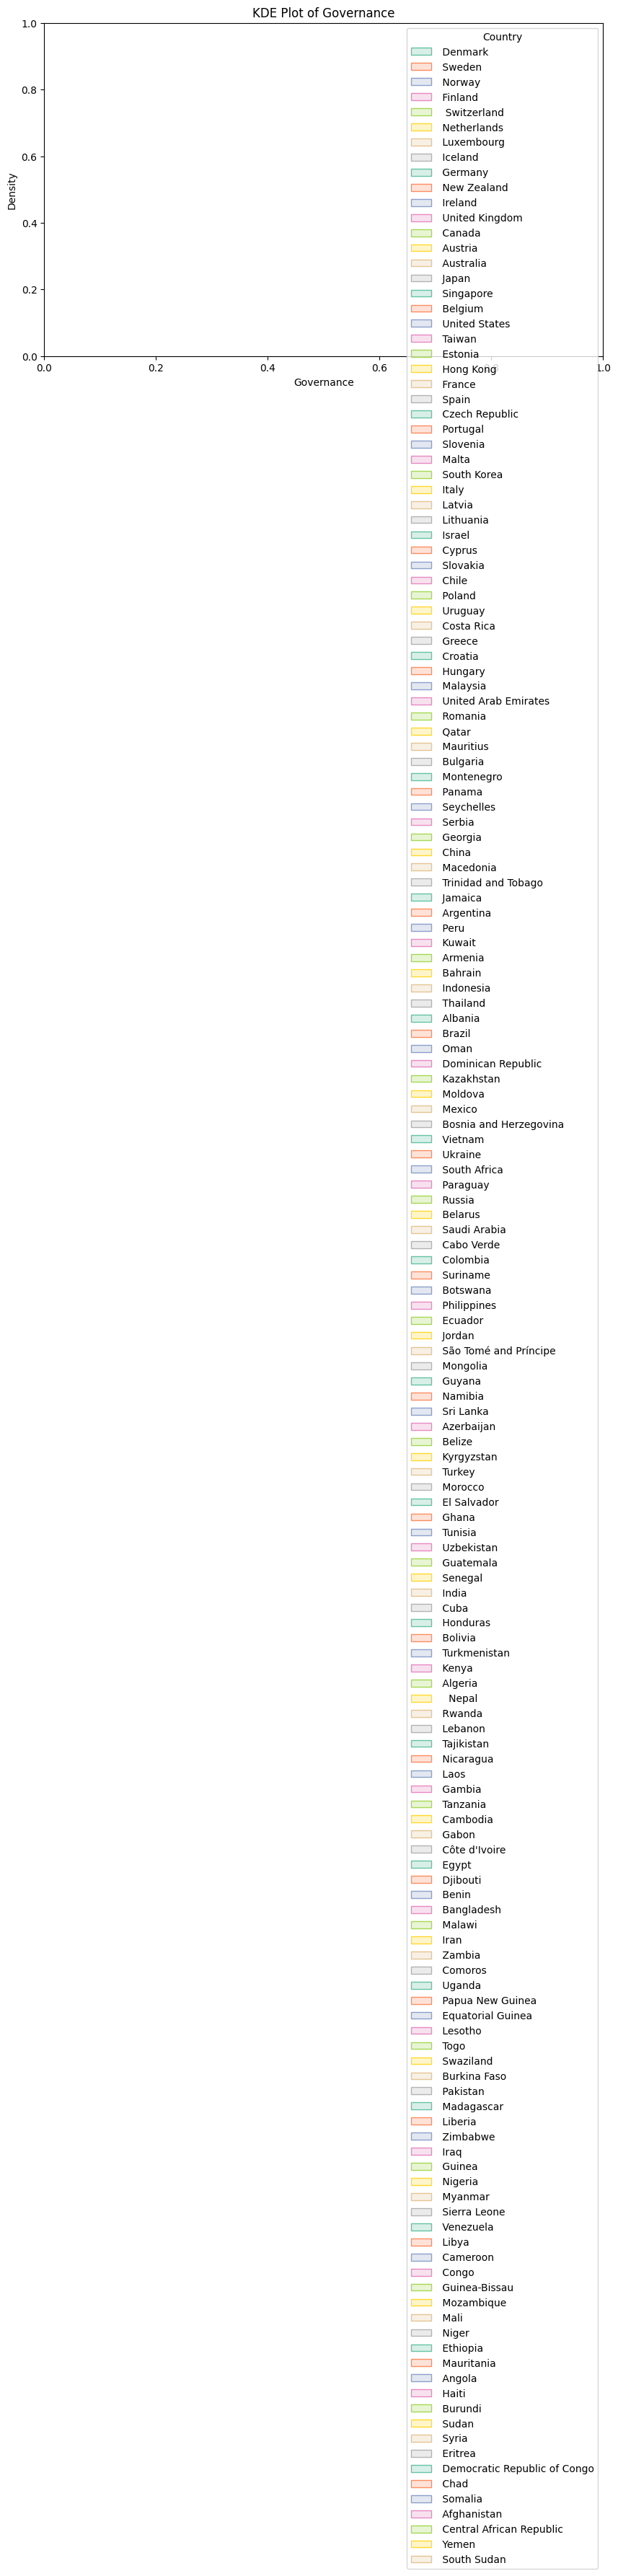

C:\Users\sleep\AppData\Local\Temp\ipykernel_22780\1636073632.py:7: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=df, x=col, hue=categorical_column, fill=True, palette='Set2')


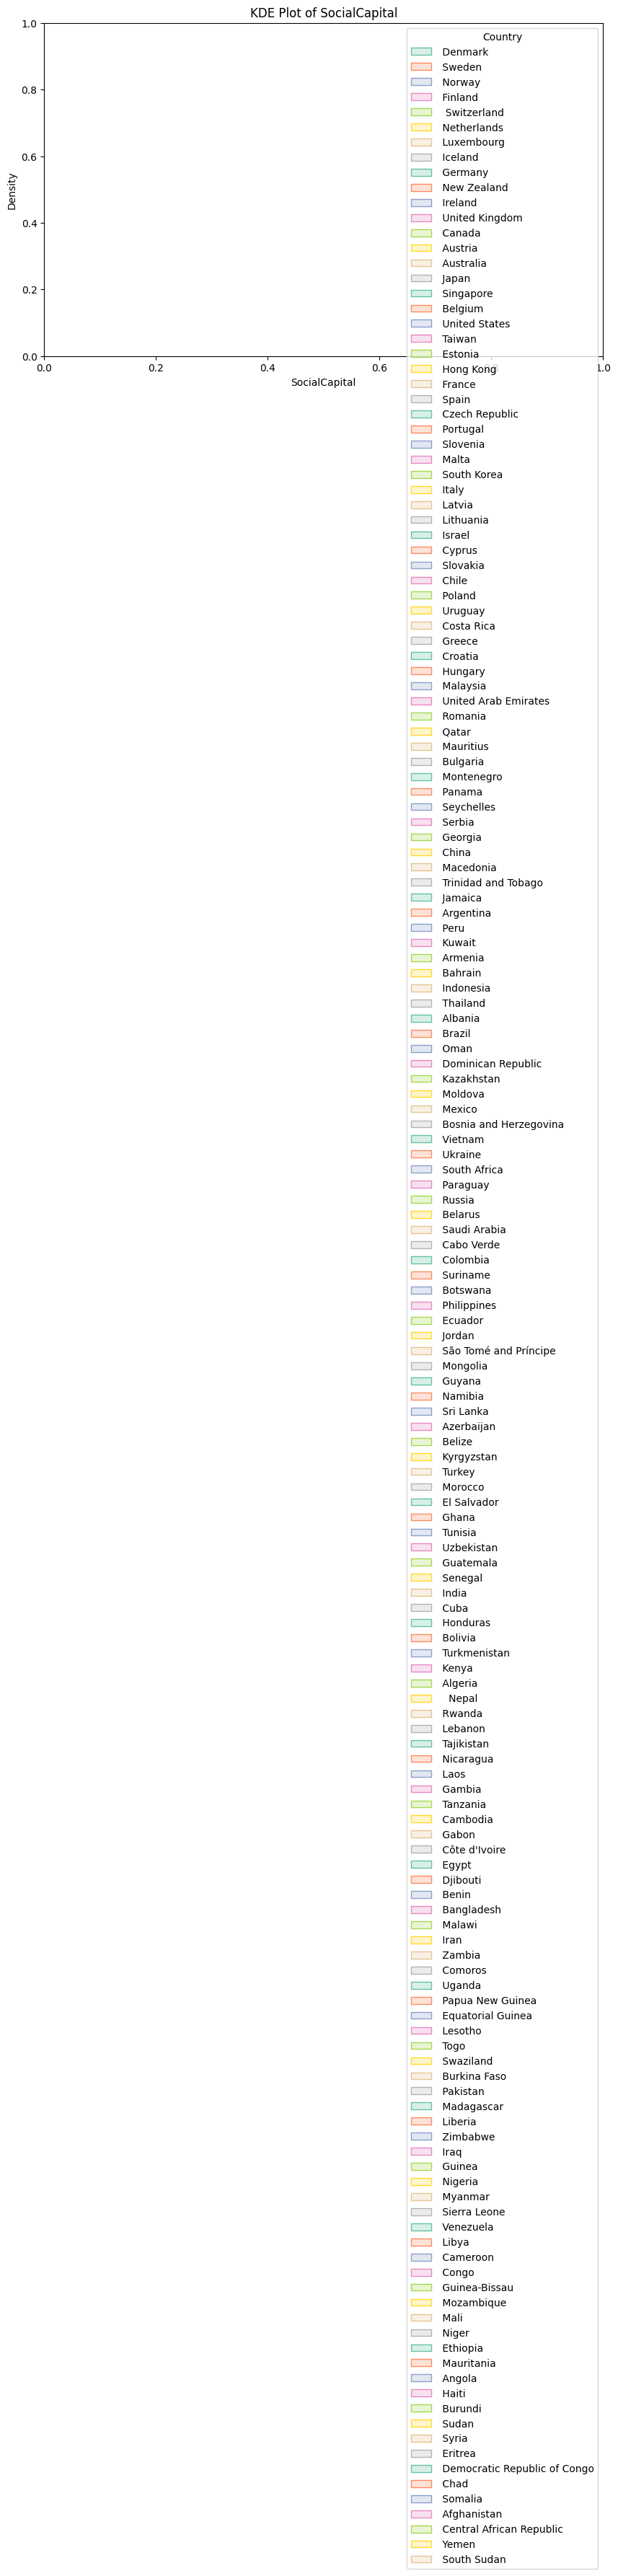

C:\Users\sleep\AppData\Local\Temp\ipykernel_22780\1636073632.py:7: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=df, x=col, hue=categorical_column, fill=True, palette='Set2')


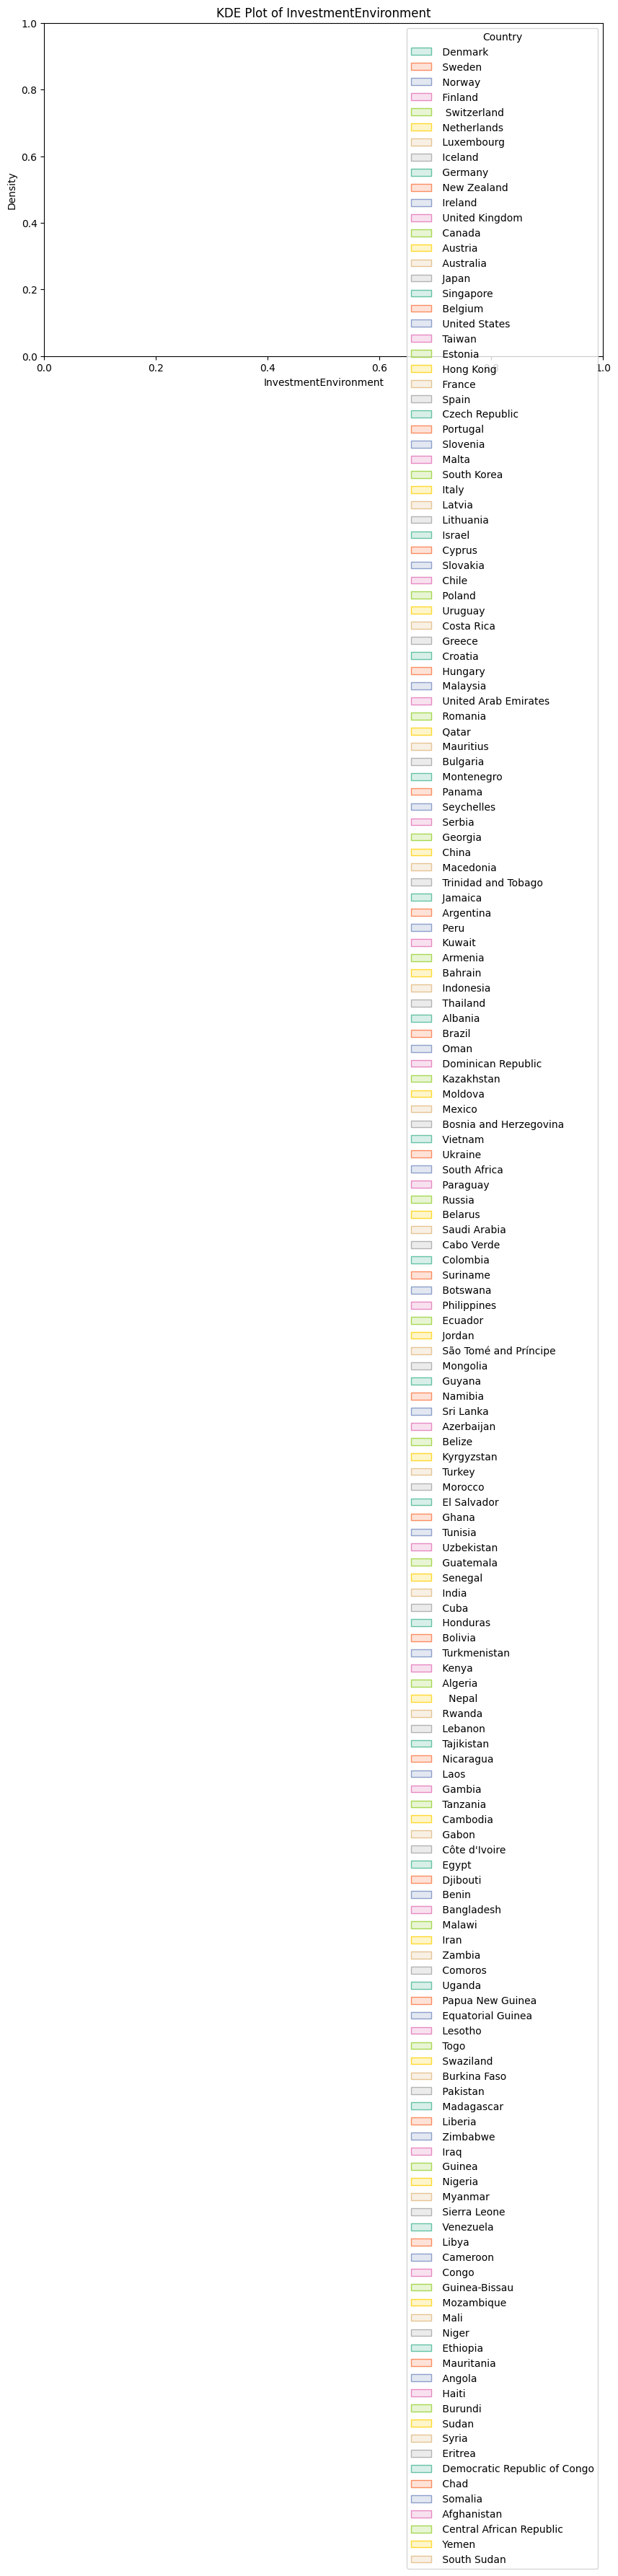

C:\Users\sleep\AppData\Local\Temp\ipykernel_22780\1636073632.py:7: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=df, x=col, hue=categorical_column, fill=True, palette='Set2')


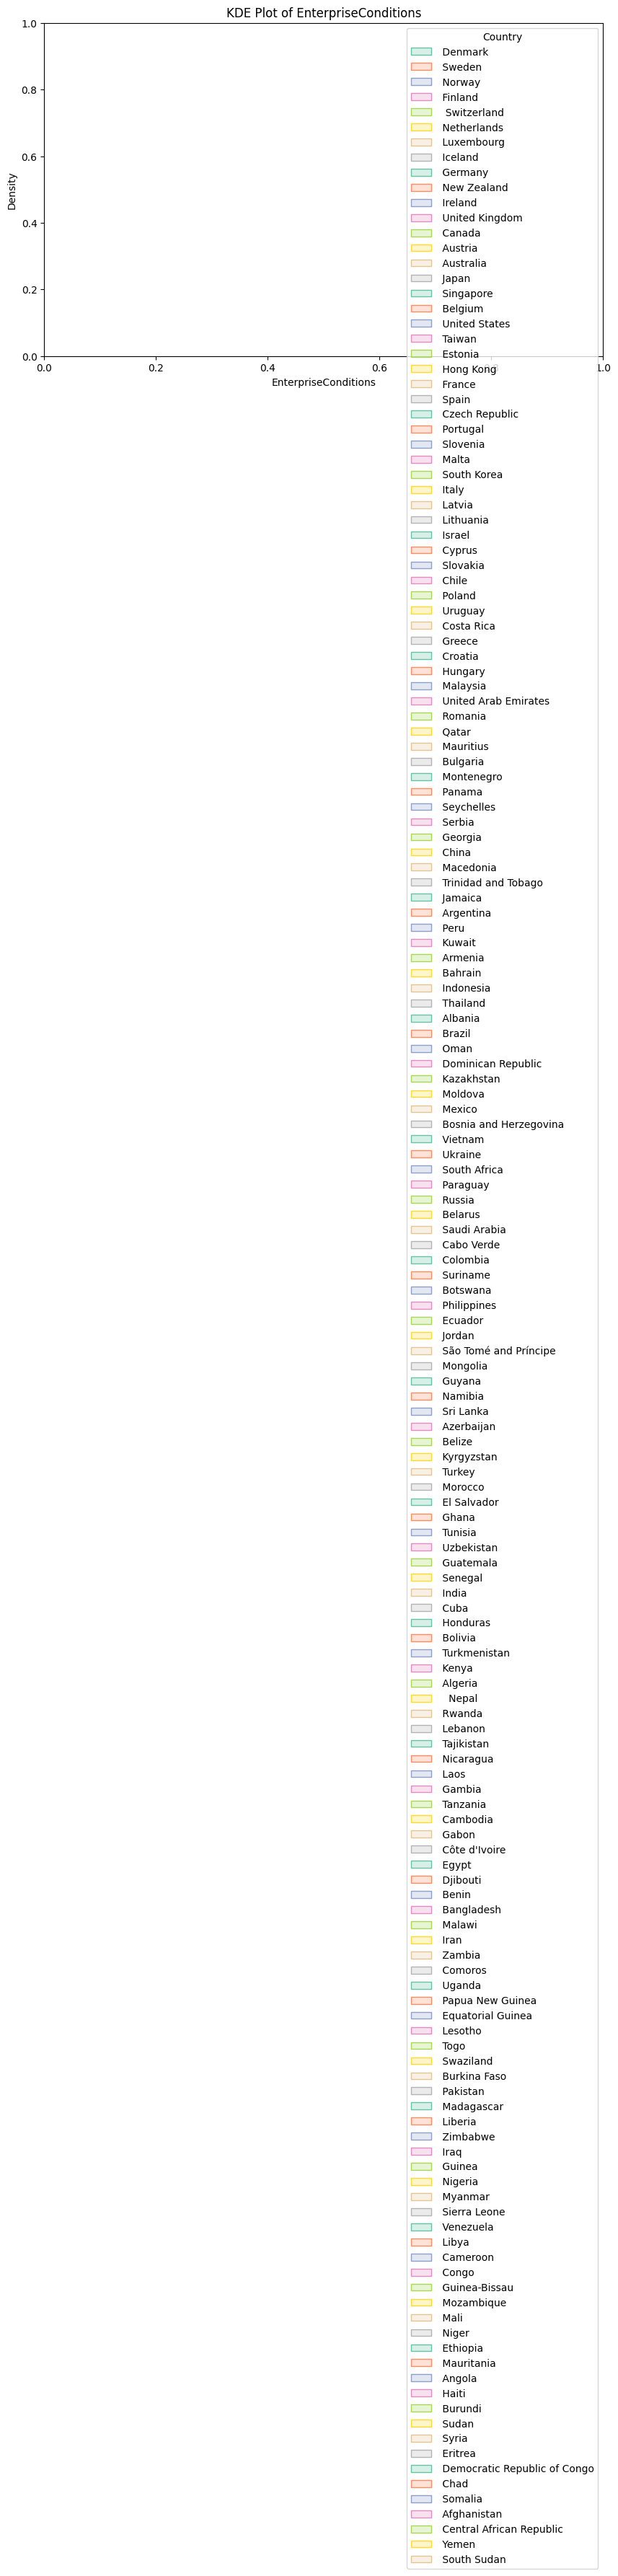

C:\Users\sleep\AppData\Local\Temp\ipykernel_22780\1636073632.py:7: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=df, x=col, hue=categorical_column, fill=True, palette='Set2')


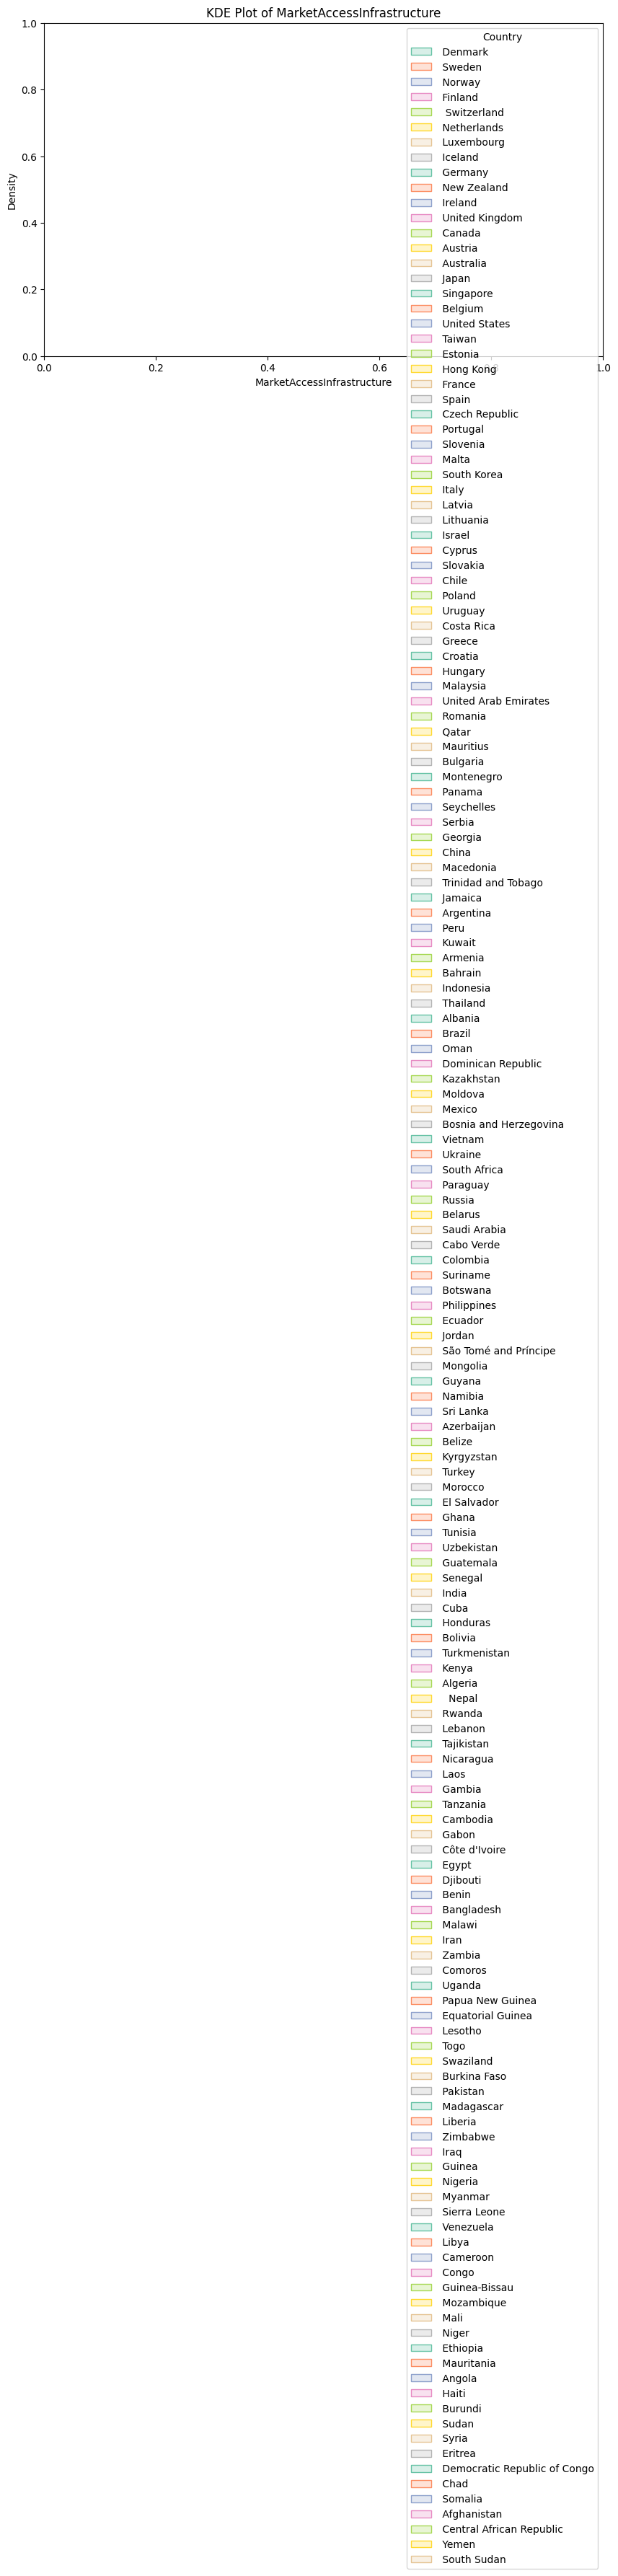

C:\Users\sleep\AppData\Local\Temp\ipykernel_22780\1636073632.py:7: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=df, x=col, hue=categorical_column, fill=True, palette='Set2')


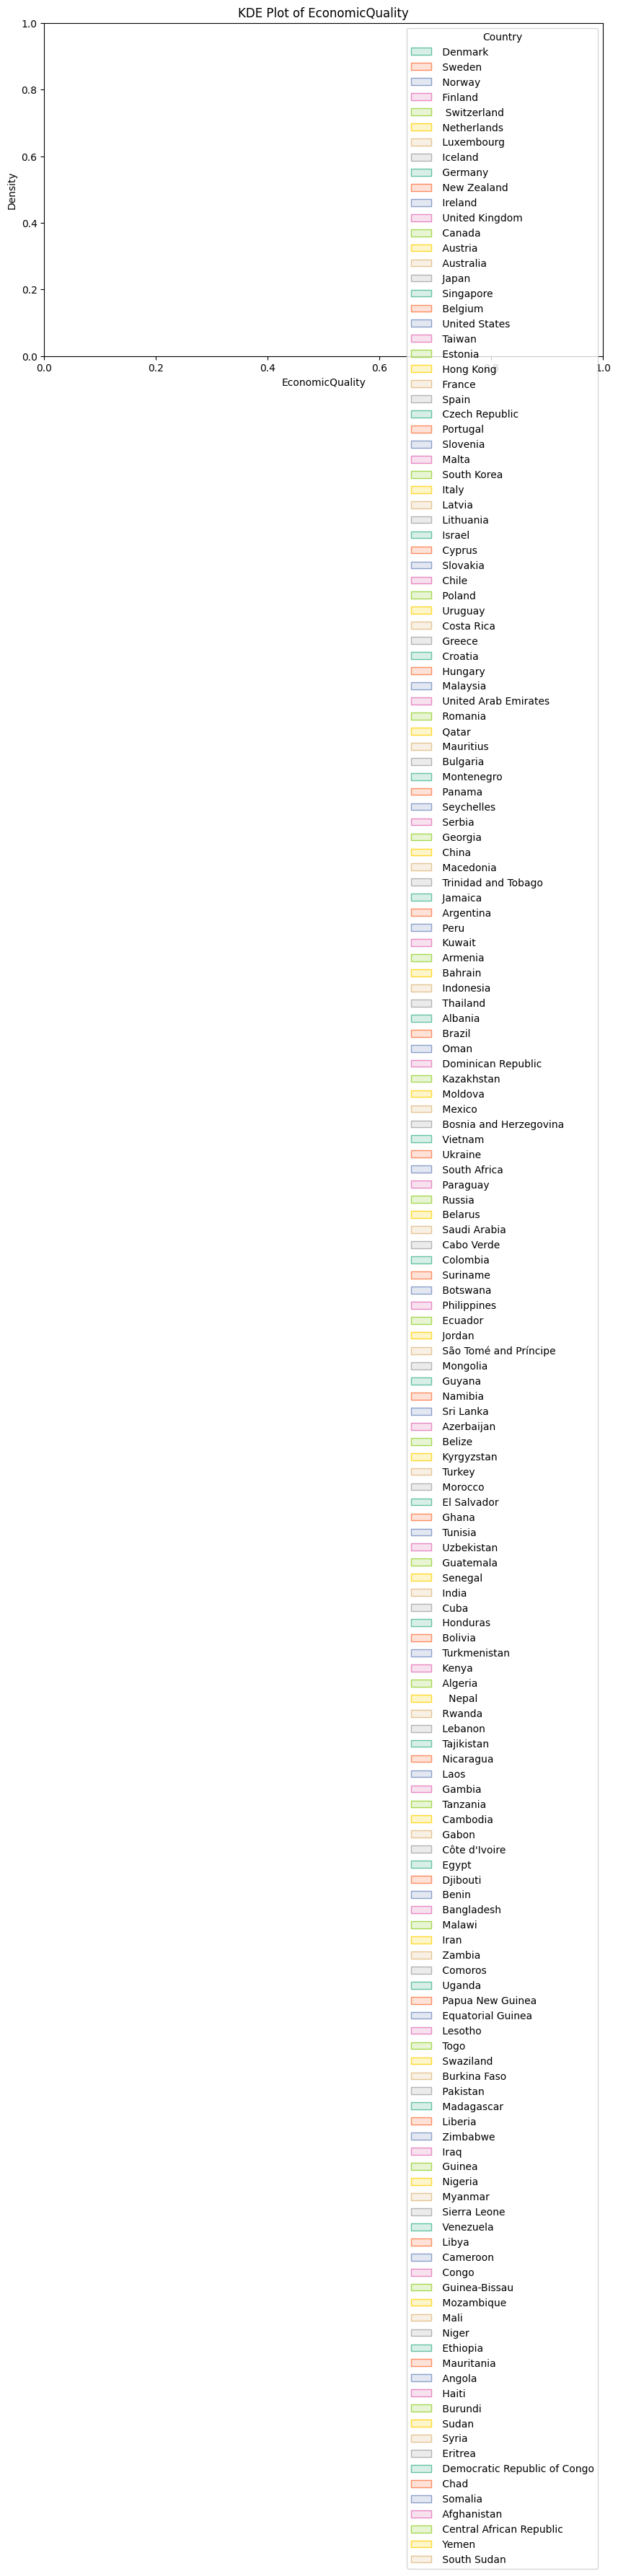

C:\Users\sleep\AppData\Local\Temp\ipykernel_22780\1636073632.py:7: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=df, x=col, hue=categorical_column, fill=True, palette='Set2')


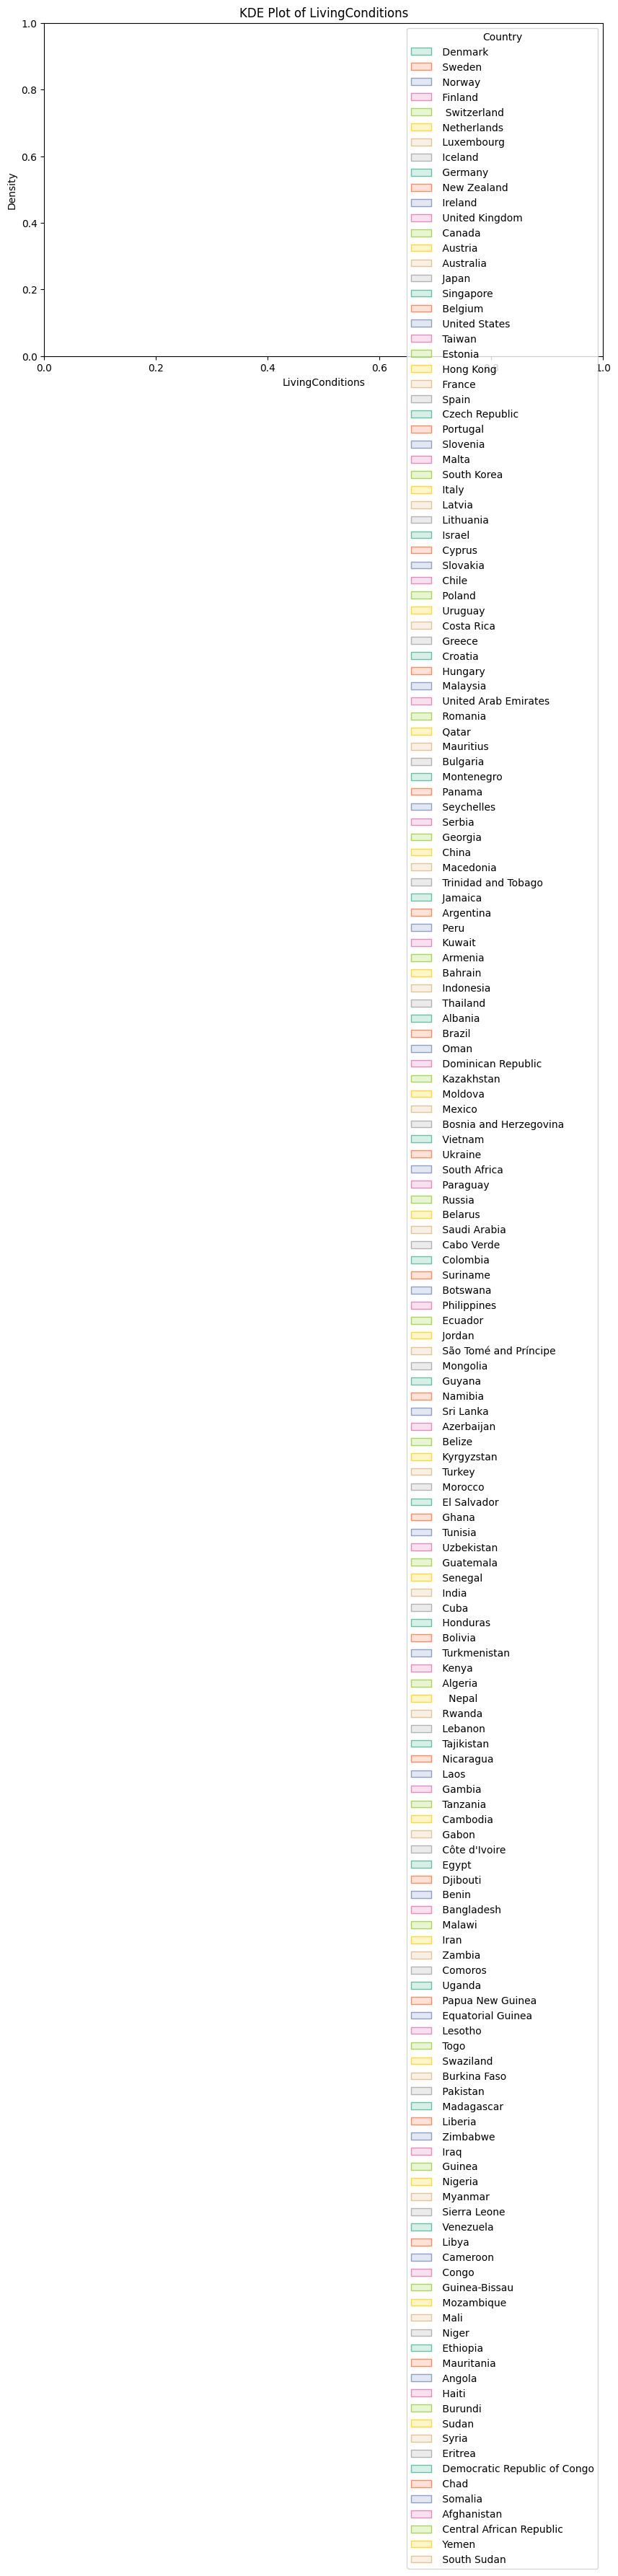

C:\Users\sleep\AppData\Local\Temp\ipykernel_22780\1636073632.py:7: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=df, x=col, hue=categorical_column, fill=True, palette='Set2')


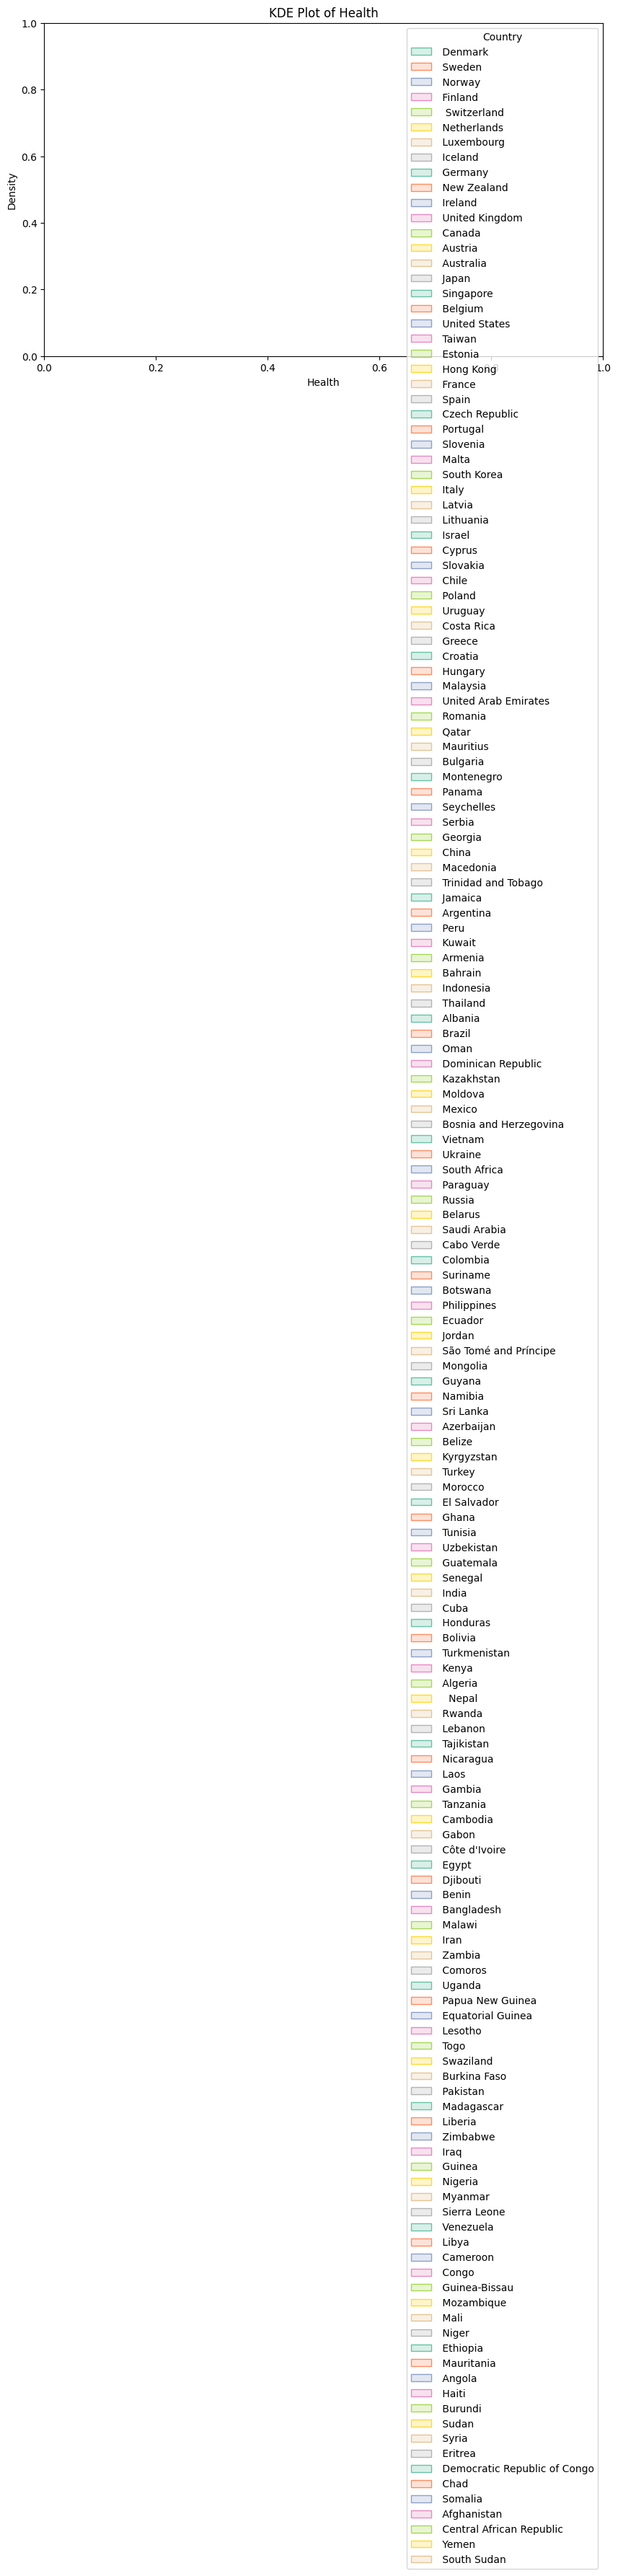

C:\Users\sleep\AppData\Local\Temp\ipykernel_22780\1636073632.py:7: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=df, x=col, hue=categorical_column, fill=True, palette='Set2')


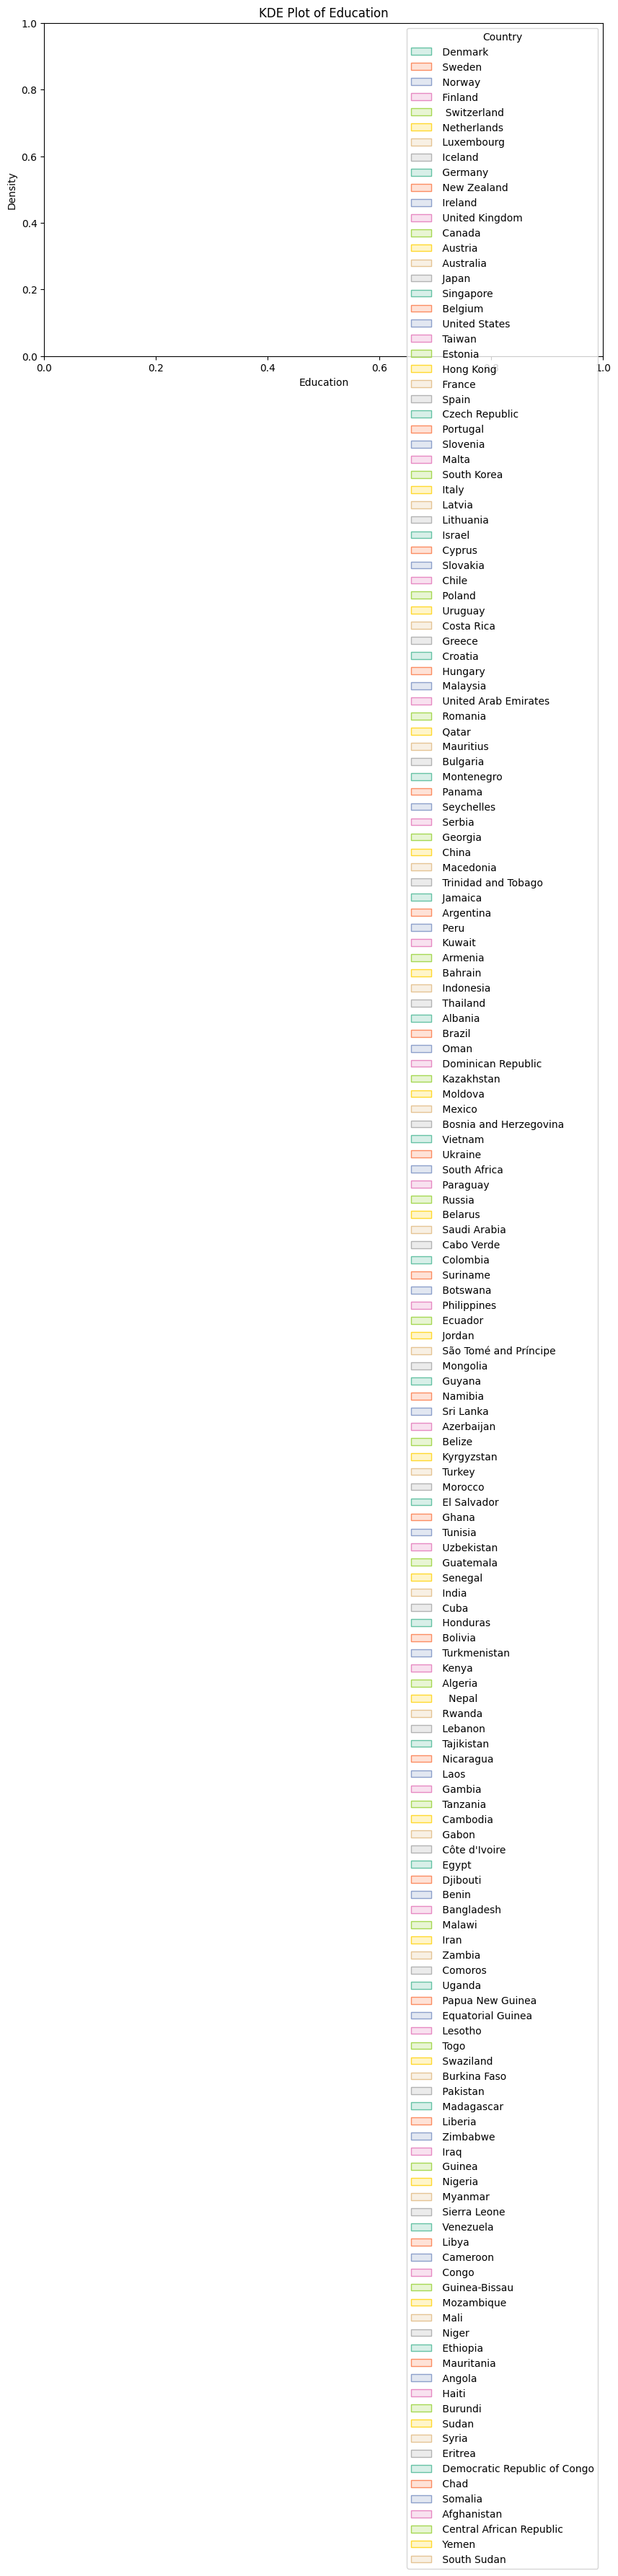

C:\Users\sleep\AppData\Local\Temp\ipykernel_22780\1636073632.py:7: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=df, x=col, hue=categorical_column, fill=True, palette='Set2')


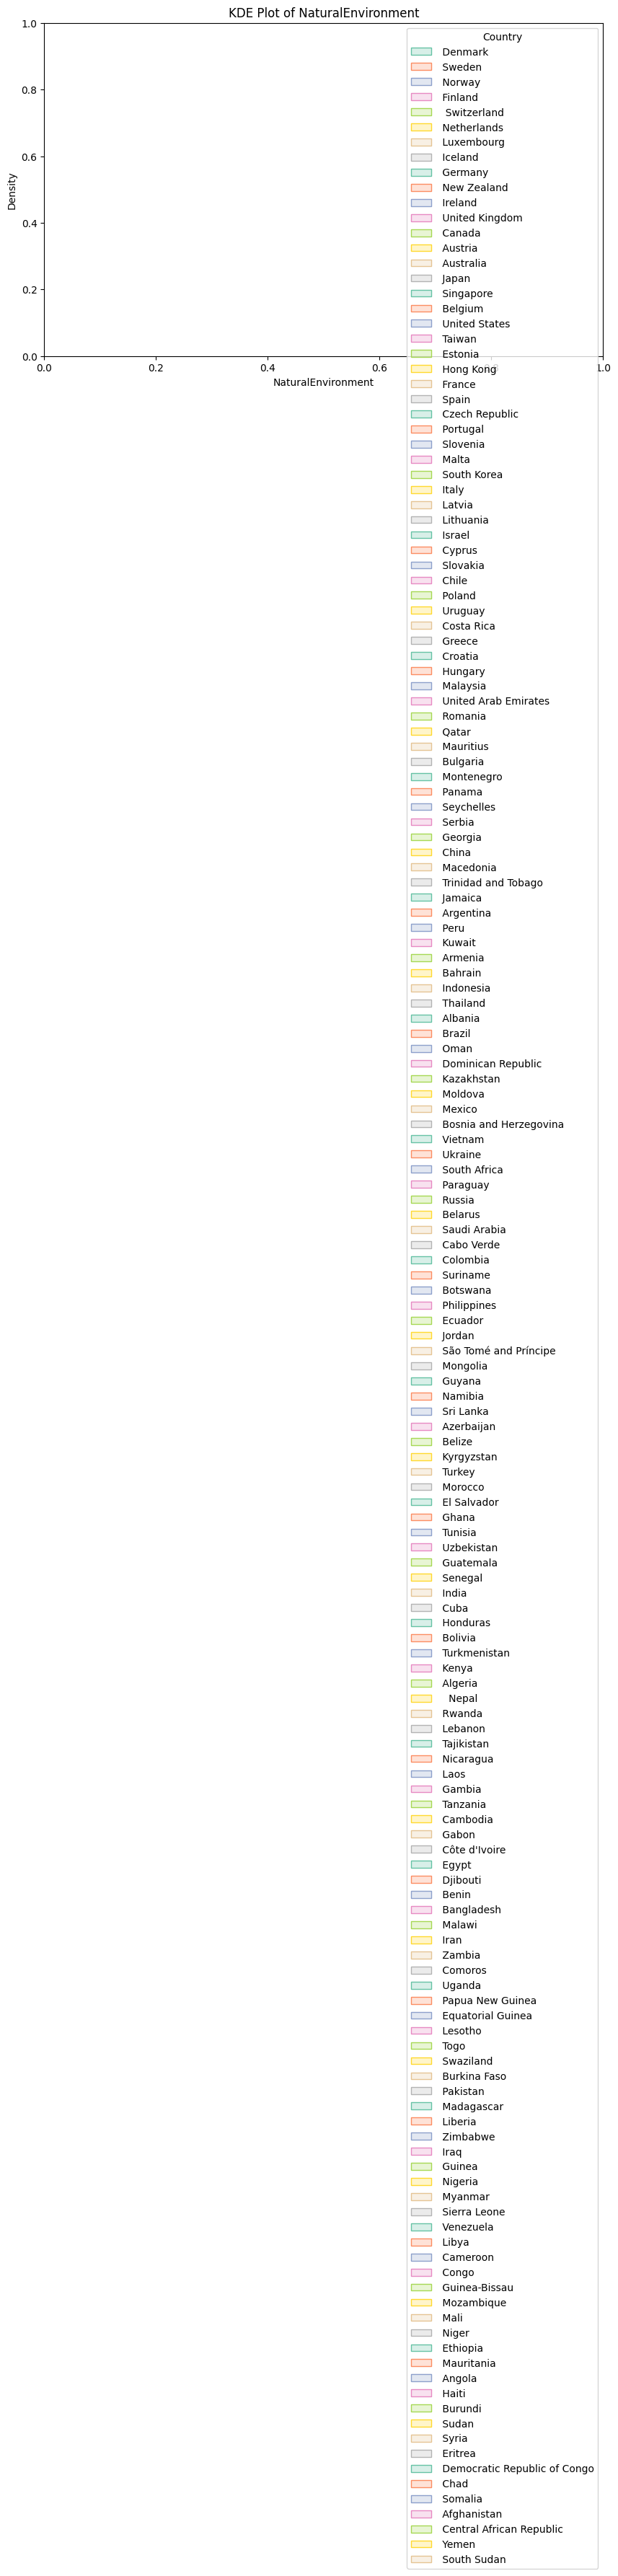

In [9]:
# If you have a categorical column, use it for hue
df_numeric = df.select_dtypes(include=['float64', 'int64'])
categorical_column = df.select_dtypes(include=['object']).columns[0]  # Assuming the first object column is categorical
if categorical_column in df.columns:
    for col in df_numeric.columns:
        plt.figure(figsize=(10, 6))
        sns.kdeplot(data=df, x=col, hue=categorical_column, fill=True, palette='Set2')
        plt.title(f'KDE Plot of {col}')
        plt.xlabel(col)
        plt.ylabel('Density')
        plt.show()
else:
    # If no categorical column, just use colors
    colors = sns.color_palette('husl', n_colors=len(df_numeric.columns))  # Generate a color palette
    for col, color in zip(df_numeric.columns, colors):
        plt.figure(figsize=(10, 6))
        sns.kdeplot(df_numeric[col], fill=True, color=color)
        plt.title(f'KDE Plot of {col}')
        plt.xlabel(col)
        plt.ylabel('Density')
        plt.show()